In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
with open('kepler.csv', 'r') as f:
    lines = f.readlines()

comment_count = 0
for line in lines:
    if line.startswith('#'):
        comment_count += 1
    else:
        break
print(f"Number of comment lines to skip: {comment_count}")

df = pd.read_csv('kepler.csv', skiprows=comment_count)

Number of comment lines to skip: 144


In [5]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [7]:
df.shape

(9564, 140)

### 140 columns?? Not all are important

In [8]:
df.isnull().sum()

,0
kepid,0
kepoi_name,0
kepler_name,6817
koi_disposition,0
koi_vet_stat,0
...,...
koi_dikco_mra_err,570
koi_dikco_mdec,570
koi_dikco_mdec_err,570
koi_dikco_msky,570


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [15]:
missing_percent = (df.isnull().sum() / len(df) * 100).to_dict()
for col, percent in missing_percent.items():
    print(f"{col}: {percent:.2f}%")

kepid: 0.00%
kepoi_name: 0.00%
kepler_name: 71.28%
koi_disposition: 0.00%
koi_vet_stat: 0.00%
koi_vet_date: 0.00%
koi_pdisposition: 0.00%
koi_score: 15.79%
koi_fpflag_nt: 0.00%
koi_fpflag_ss: 0.00%
koi_fpflag_co: 0.00%
koi_fpflag_ec: 0.00%
koi_disp_prov: 0.00%
koi_comment: 12.64%
koi_period: 0.00%
koi_period_err1: 4.75%
koi_period_err2: 4.75%
koi_time0bk: 0.00%
koi_time0bk_err1: 4.75%
koi_time0bk_err2: 4.75%
koi_time0: 0.00%
koi_time0_err1: 4.75%
koi_time0_err2: 4.75%
koi_eccen: 3.80%
koi_eccen_err1: 100.00%
koi_eccen_err2: 100.00%
koi_longp: 100.00%
koi_longp_err1: 100.00%
koi_longp_err2: 100.00%
koi_impact: 3.80%
koi_impact_err1: 4.75%
koi_impact_err2: 4.75%
koi_duration: 0.00%
koi_duration_err1: 4.75%
koi_duration_err2: 4.75%
koi_ingress: 100.00%
koi_ingress_err1: 100.00%
koi_ingress_err2: 100.00%
koi_depth: 3.80%
koi_depth_err1: 4.75%
koi_depth_err2: 4.75%
koi_ror: 3.80%
koi_ror_err1: 3.80%
koi_ror_err2: 3.80%
koi_srho: 3.36%
koi_srho_err1: 3.36%
koi_srho_err2: 3.36%
koi_fittype: 0

In [ ]:
#

### There could be two target classes 'koi disposition', 'koi pdisposition'



In [9]:
df['koi_pdisposition'].value_counts()

,count
koi_pdisposition,
FALSE POSITIVE,4847
CANDIDATE,4717


/tmp/ipython-input-4079288273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'koi_pdisposition', data=df, palette = "Set2", ax = ax[0])


Text(0.5, 0.98, 'Candidate: Potential Exoplanet; FALSE POSITIVE: NOT Exoplanet\n')

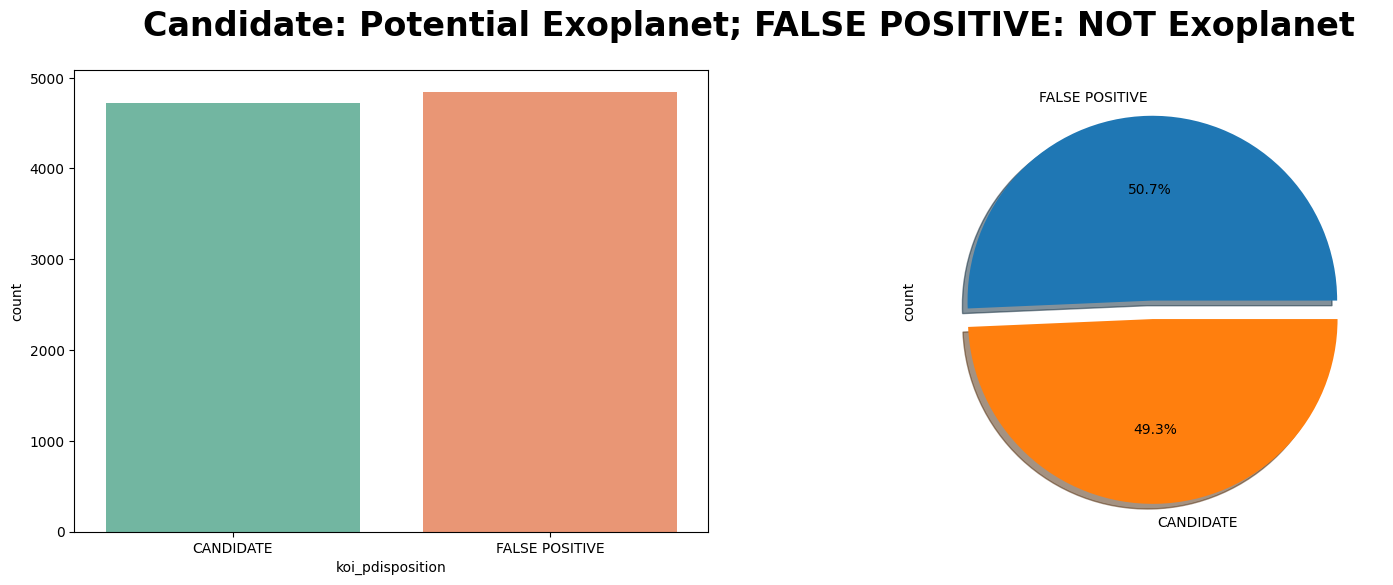

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.countplot(x = 'koi_pdisposition', data=df, palette = "Set2", ax = ax[0])
ax[0].set_xlabel('koi_pdisposition')
df['koi_pdisposition'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[1], shadow = True)
fig.suptitle('Candidate: Potential Exoplanet; FALSE POSITIVE: NOT Exoplanet\n', fontsize = 24, fontweight = 'bold')

### here the data is almost balanced

In [10]:
df['koi_disposition'].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4839
CONFIRMED,2746
CANDIDATE,1979


/tmp/ipython-input-3220553260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'koi_disposition', data=df, palette = "Set2", ax = ax[0])


Text(0.5, 0.98, 'CONFIRMED/Candidate: Exoplanet; FALSE POSITIVE: NOT Exoplanet\n')

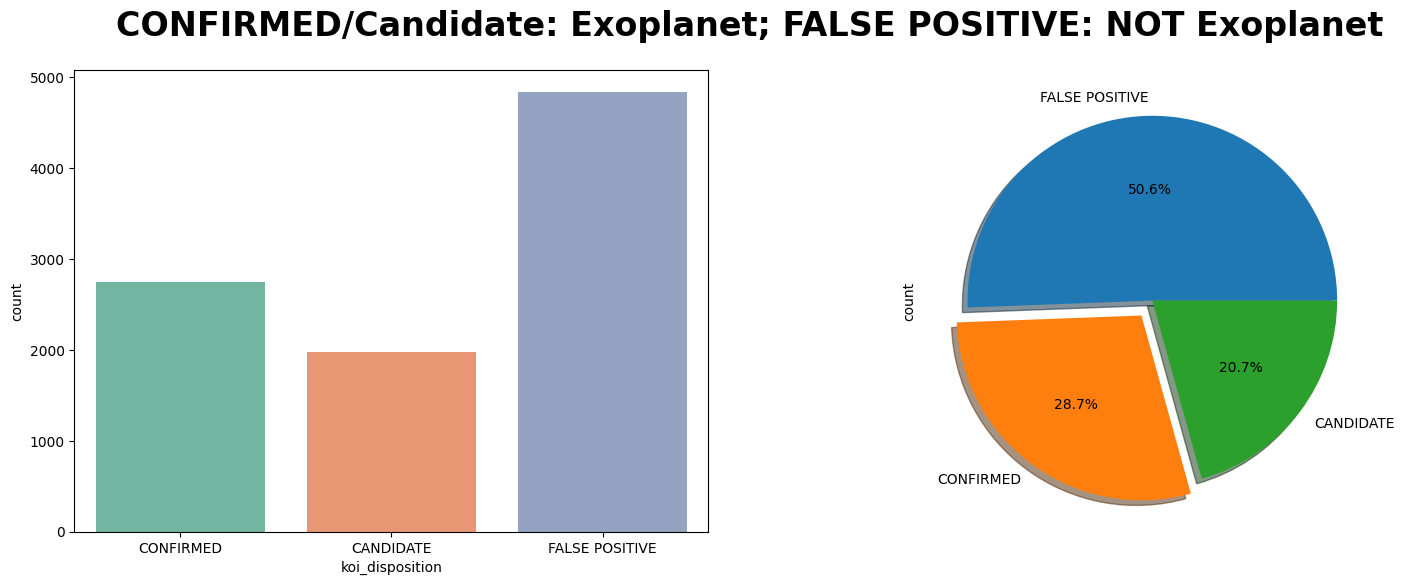

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.countplot(x = 'koi_disposition', data=df, palette = "Set2", ax = ax[0])
ax[0].set_xlabel('koi_disposition')
df['koi_disposition'].value_counts().plot.pie(explode = [0,0.1, 0], autopct ='%1.1f%%',ax = ax[1], shadow = True)
fig.suptitle('CONFIRMED/Candidate: Exoplanet; FALSE POSITIVE: NOT Exoplanet\n', fontsize = 24, fontweight = 'bold')

In [17]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat',
       'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss',
       ...
       'koi_dicco_mdec', 'koi_dicco_mdec_err', 'koi_dicco_msky',
       'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
       'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky',
       'koi_dikco_msky_err'],
      dtype='object', length=140)